In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
plt.rcParams['image.cmap'] = 'RdBu_r'


In [12]:
def svd(A):
    # Compute the eigenvectors and eigenvalues of A.T @ A
    w, V = LA.eig(np.nan_to_num(A.T @ A))  
    # Calculate sigma values (singular values)
    sigma = np.sqrt(np.abs(w))
    # Create the diagonal matrix D using singular values
    D = np.diag(sigma) 
    # Calculate the U matrix
    U = np.zeros(A.shape)
    for i in range(len(sigma)):
        if sigma[i] != 0:
            U[:, i] = (1 / sigma[i]) * A @ V[:, i]
        else:
            U[:, i] = 0
    return U, D, V.T

# Example usage:
A = np.array([[1, 0],
              [1, 0],
              [0, 1]])
U, D, Vt =svd(A)
print("SVD:")
print("U:", U)
print("D:", D)
print("Vt:", Vt)

SVD:
U: [[0.70710678 0.        ]
 [0.70710678 0.        ]
 [0.         1.        ]]
D: [[1.41421356 0.        ]
 [0.         1.        ]]
Vt: [[1. 0.]
 [0. 1.]]


In [3]:
LA.norm(U@D@Vt-A)

0.0

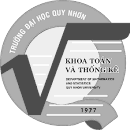

In [117]:
image = Image.open("images.png")

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(gray_image, dtype=np.float64)
display(gray_image)

In [39]:
U, D, Vt = svd(image_array)

In [6]:
LA.norm(U@ D@ Vt - image_array)

8.380218993166975e-08

Text(0.5, 1.0, 'Singular Values, $S_k$')

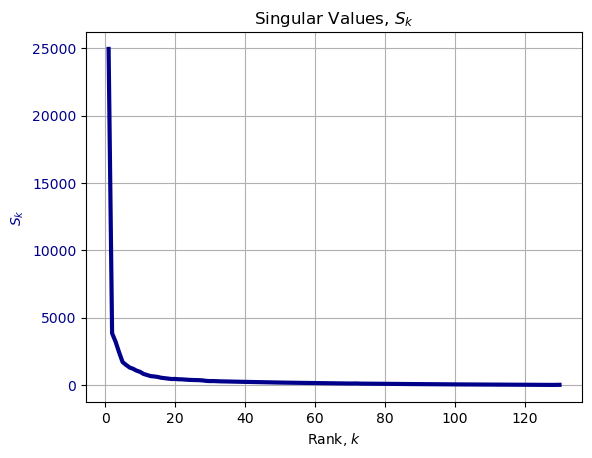

In [26]:
### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')


In [27]:
rank_info_retained

0.9996291974891308

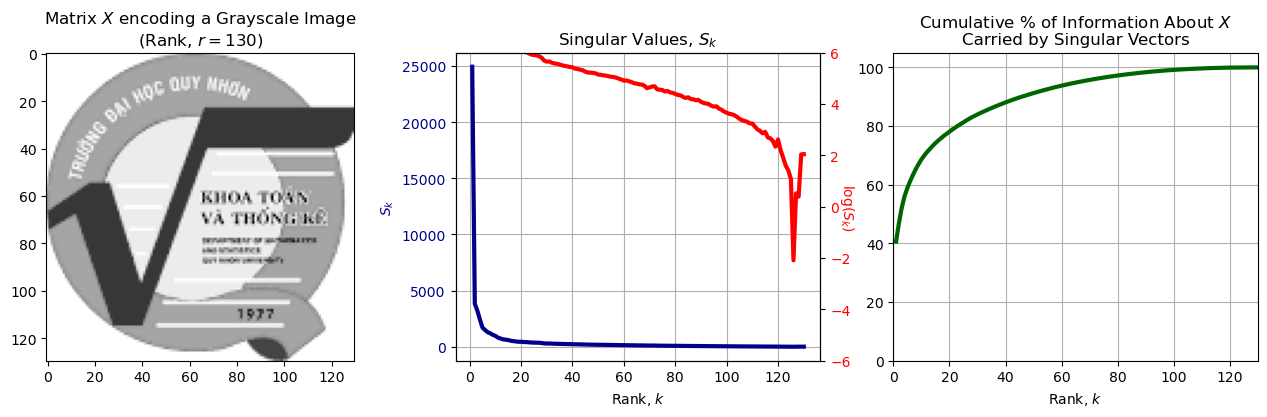

In [42]:
img_rank = np.linalg.matrix_rank(image_array, 0.)
S = np.diag(D)

# Calculate the cumulative variance explained by each singular value
total_S = S.sum()
n_components = len(S)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(S) / total_S

# Visualizations
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

## Raw Image, X
plt.sca(axs[0])
plt.imshow(image_array, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${img_rank})")

## Singular values as function of rank
plt.sca(axs[1])

### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
plt.sca(axs[2])
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.savefig('image-singular-values.png', bbox_inches='tight', dpi=300)

In [44]:
info_retained

array([ 40.62263176,  46.86827785,  52.09157541,  56.0334266 ,
        58.80236257,  61.21963813,  63.33014305,  65.28155012,
        67.00744725,  68.58847969,  69.91654271,  71.11631096,
        72.18302325,  73.21010718,  74.17805149,  75.0477979 ,
        75.86617675,  76.64562106,  77.35968846,  78.08224365,
        78.76817724,  79.44085364,  80.08121899,  80.69308689,
        81.2943769 ,  81.88891148,  82.46255449,  83.00441034,
        83.48771171,  83.95182449,  84.41944661,  84.86417214,
        85.29627245,  85.72340589,  86.13957584,  86.54187413,
        86.93410262,  87.32038178,  87.69745411,  88.07078456,
        88.42444119,  88.77320899,  89.11229864,  89.4442762 ,
        89.75807826,  90.06246818,  90.36452615,  90.66440939,
        90.95844541,  91.23913629,  91.51718315,  91.78907532,
        92.058478  ,  92.32124572,  92.57877398,  92.83338527,
        93.08209899,  93.32131125,  93.55324621,  93.77451496,
        93.9974282 ,  94.21381891,  94.42306131,  94.62

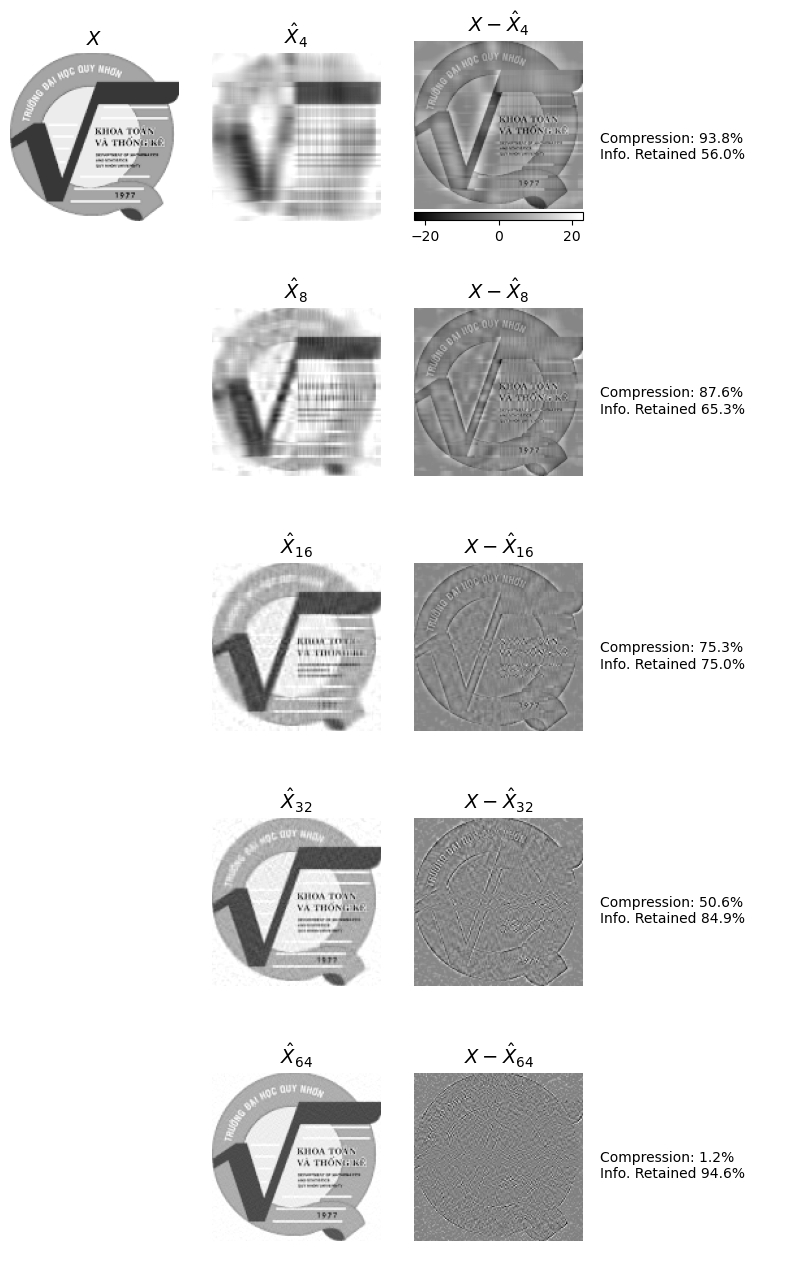

In [46]:
X = image_array
# S = np.diag(D)

# # Calculate explained variance ratio
# info_retained = np.cumsum(S**2) / np.sum(S**2)

# Image Reconstruction
N = 5
fig, axs = plt.subplots(N, 4, figsize=(10, 16))
plt.sca(axs[0][0])
plt.imshow(image_array, cmap='gray')
# plt.clim([0, 255])
plt.axis('off')
plt.title("$X$", fontsize=14)

# Reconstruct image with increasing number of singular vectors/values
for power in range(1, N + 1):
    rank = 2 ** (1 + power)

    # Compressed/Reconstructed Image
    X_reconstruction = U[:, :rank] @ D[:rank, :rank] @ Vt[:rank, :]

    # Calculate number of floats required to store compressed image
    rank_data_compression = 100 * (1. - (1. * U[:, :rank].size + S[:rank].size + Vt[:rank, :].size) / image_array.size)

    # Variance of original image explained by n components
    rank_info_retained = info_retained[rank-1]

    # Visualizations
    ## Original Image
    if power > 1:
        plt.sca(axs[power-1][0])
        plt.cla()
        plt.axis('off')

    ## Image reconstruction
    plt.sca(axs[power-1][1])
    X_reconstruction = np.clip(X_reconstruction, 0, 255).astype(np.uint8)
    plt.imshow(X_reconstruction, cmap='gray')
    plt.clim([0, 255])
    plt.axis('off')
    plt.title(f'$\hat{{X}}_{{{rank}}}$',fontsize=14)

    ## Reconstruction error
    plt.sca(axs[power-1][2])
    cax = plt.imshow(X - X_reconstruction,cmap='gray')
    plt.axis('off')
    plt.title(f'$X -\hat{{X}}_{{{rank}}}$',fontsize=14)


    ## Compression/reconstruction info
    plt.sca(axs[power-1][3])
    compression_text = f'Compression: {rank_data_compression:1.1f}%\nInfo. Retained {rank_info_retained:1.1f}%'
    plt.text(-.1, .4, compression_text)
    plt.axis('off')
    
fig.colorbar(cax, ax=axs[0][2], pad=.01, orientation='horizontal')
plt.savefig('svd_qnu.png', bbox_inches='tight', dpi=300)

In [9]:
X_centered =  image_array - np.mean(image_array, axis=0)

In [10]:
X_centered = np.array(X_centered, dtype=np.float64)

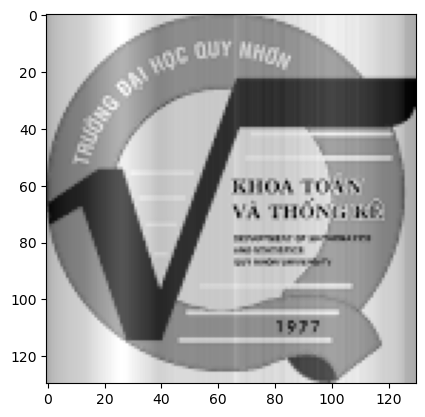

In [11]:
plt.imshow(X_centered,cmap='gray')

In [12]:
U, D, Vt = svd(X_centered)

In [ ]:
LA.norm(A@Bt-X_centered)

In [15]:
k=100

In [ ]:
A_k =m**(1/2)*U[:,:k]
Bt_k =m**(-1/2)*D[:k,:k]@Vt[:k,:]

In [189]:

def pca(X, k):
    # Center the data
    X_centered = X - np.mean(X)
    
    # Perform SVD on the centered data
    U, D, Vt = svd(X_centered)
    
    # Compute the transformed matrices
    m = X_centered.shape[0]
    A = U
    Bt = D@Vt

    # Reduce the dimensionality to k dimensions
    A_k = U[:,:k]
    Bt_k = D[:k,:k]@Vt[:k,:]

    return A_k, Bt_k


In [6]:
A_k, Bt_k = pca(image_array,100)

In [7]:
A_k, Bt_k = pca(A,2)

In [15]:
 np.mean(A, axis=0)

array([0.66666667, 0.33333333])

In [14]:
A

array([[1, 0],
       [1, 0],
       [0, 1]])

In [15]:
np.mean(A, axis=1)

array([0.5, 0.5, 0.5])

In [13]:
A_centered = A - np.mean(A, axis=1)

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [14]:
A_centered

array([[ 0.33333333, -0.33333333],
       [ 0.33333333, -0.33333333],
       [-0.66666667,  0.66666667]])

In [17]:
U, D, Vt = svd(A_centered)

In [18]:
U

array([[ 0.        ,  0.40824829],
       [ 0.        ,  0.40824829],
       [ 0.        , -0.81649658]])

In [9]:
Bt_k

array([[ 0.        ,  0.        ],
       [ 0.47140452, -0.47140452]])

In [12]:
A_k@Bt_k +np.mean(A, axis=0)

array([[1.00000000e+00, 1.11022302e-16],
       [1.00000000e+00, 1.11022302e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [ ]:
LA.norm(A_k@Bt_k - X_centered)

In [64]:
X_centered = X - np.mean(X.T)

In [66]:
X_centered.shape

(77760, 165)

In [135]:
from sklearn.decomposition import PCA
pca_real = PCA(n_components=100) # K = 100
pca_real.fit(X.T)


PCA(n_components=100)

In [138]:
pca_real.mean_.shape

(77760,)

In [136]:
X_transformed = pca_real.transform(X.T)

In [137]:
X_transformed.shape

(165, 100)

In [139]:
pca_real.components_.T.shape

(77760, 100)

In [141]:
pca_real.components_.T@X_transformed.T

array([[ 3.6800269 , 13.01767239, 10.20170813, ...,  3.43518823,
        12.34006812,  7.36646345],
       [ 4.51517704, 10.44654894,  4.4196056 , ...,  6.97133259,
         3.82221908,  7.97817151],
       [ 3.17612404,  9.67563254,  3.63641912, ...,  7.723701  ,
         2.33880399,  8.00579092],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [143]:
X_approx = pca_real.components_.T@X_transformed.T + pca_real.mean_.reshape(-1,1)


In [144]:
LA.norm(X_approx.T - X.T)

26410.555903744826

In [72]:
X_approx.T[0,].shape

(77760,)

In [78]:
X[:,0].shape

(77760,)

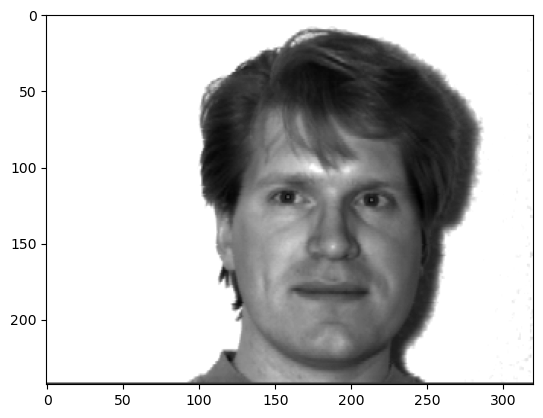

In [79]:
plt.imshow(X[:,0].reshape(h,w),cmap='gray')

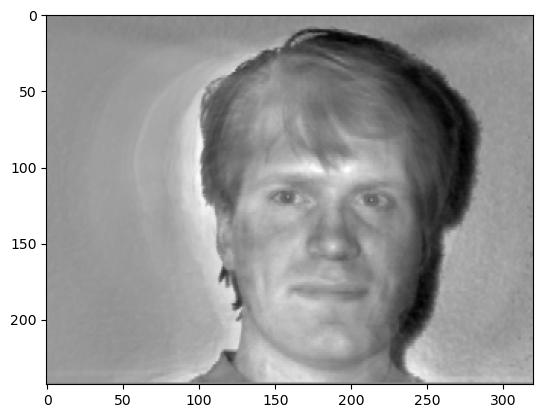

In [83]:
plt.imshow(X_approx[:,0].reshape(h,w),cmap='gray')

In [74]:
X_approx.T[0].reshape(h,w).shape

(243, 320)

In [38]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

C:\Users\OS\AppData\Local\Temp\ipykernel_18332\4291633668.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)
C:\Users\OS\AppData\Local\Temp\ipykernel_18332\4291633668.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


In [16]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = (w//4)*(h//4)
N = len(states)*15

X = np.zeros((D, N))  # Updated to match the new image size
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        img = Image.open(fn)
        img_resized = img.resize((w//4, h//4))
        X[:, cnt] = np.array(img_resized).reshape(D)
        cnt += 1

C:\Users\OS\AppData\Local\Temp\ipykernel_18332\695346354.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


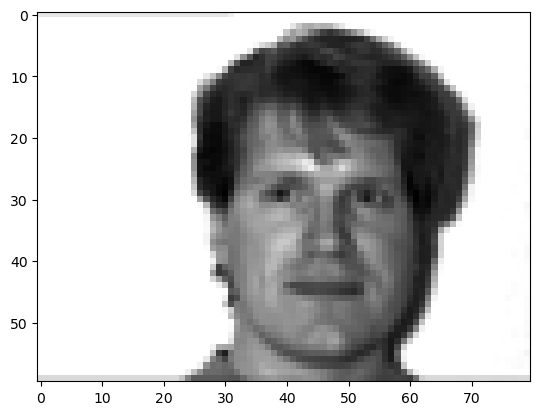

In [17]:
plt.imshow(X[:,0].reshape(60,80),cmap='gray')

In [ ]:
np.array(img_resized).shape

In [37]:
Uk, Zk = U, Z

In [119]:
U, Z = pca(X,100)

C:\Users\OS\AppData\Local\Temp\ipykernel_18332\1025514395.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:, i] = (1 / sigma[i]) * A @ V[:, i]


In [120]:
U.shape

(77760, 100)

In [121]:
Z.shape

(100, 165)

In [122]:
U@Z

array([[ -58.65778939+0.j,  -42.65134128+0.j,  -53.03053122+0.j, ...,
         -47.91856268+0.j,  -44.65998014+0.j,  -48.31433763+0.j],
       [ -54.42426027+0.j,  -46.17738514+0.j,  -53.45434662+0.j, ...,
         -46.48493593+0.j,  -50.55565819+0.j,  -43.36782828+0.j],
       [ -55.47727474+0.j,  -47.20356589+0.j,  -53.82379937+0.j, ...,
         -45.74659121+0.j,  -51.23245917+0.j,  -42.33852604+0.j],
       ...,
       [-116.03646844+0.j, -109.58135637+0.j, -114.02221359+0.j, ...,
        -108.9262035 +0.j, -109.3997581 +0.j, -106.52714148+0.j],
       [-116.03646844+0.j, -109.58135637+0.j, -114.02221359+0.j, ...,
        -108.9262035 +0.j, -109.3997581 +0.j, -106.52714148+0.j],
       [-116.03646844+0.j, -109.58135637+0.j, -114.02221359+0.j, ...,
        -108.9262035 +0.j, -109.3997581 +0.j, -106.52714148+0.j]])

In [146]:
dcm = np.float64(U@Z + np.mean(X))

C:\Users\OS\AppData\Local\Temp\ipykernel_18332\1818486962.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  dcm = np.float64(U@Z + np.mean(X))


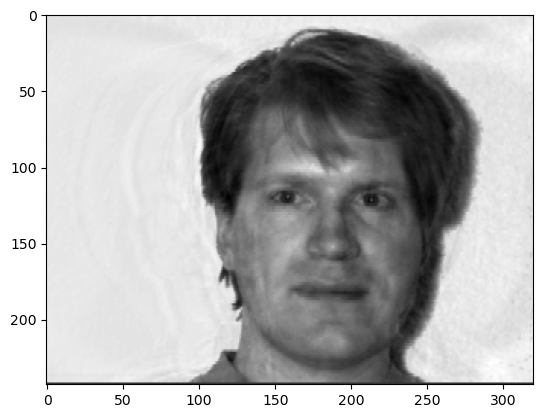

In [147]:
plt.imshow(dcm[:,0].reshape(h,w),cmap='gray')

In [150]:
Z = np.float64(Z)

C:\Users\OS\AppData\Local\Temp\ipykernel_18332\1757735824.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  Z = np.float64(Z)


In [153]:
Z.T.shape

(165, 100)

In [155]:
Z.T[0].shape

(100,)

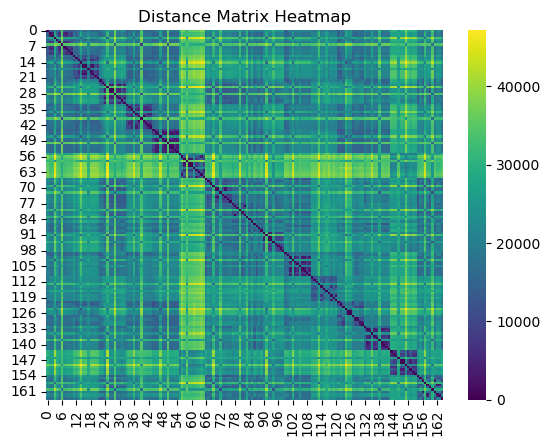

In [156]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Z.T is your data and has shape (165, 100)
distances = pdist(Z.T, 'euclidean')  # Calculate pairwise distances
dist_matrix = squareform(distances)  # Convert to a square matrix

# Plot a heatmap of the distance matrix
sns.heatmap(dist_matrix, cmap='viridis')
plt.title('Distance Matrix Heatmap')
plt.show()


In [157]:
norm = np.linalg.norm(np.float64(dcm)-X)


C:\Users\OS\AppData\Local\Temp\ipykernel_18332\1303275049.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)  #X


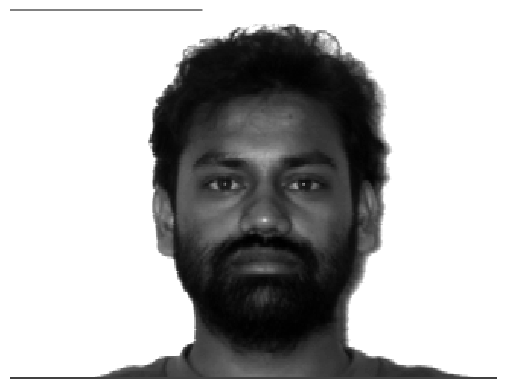

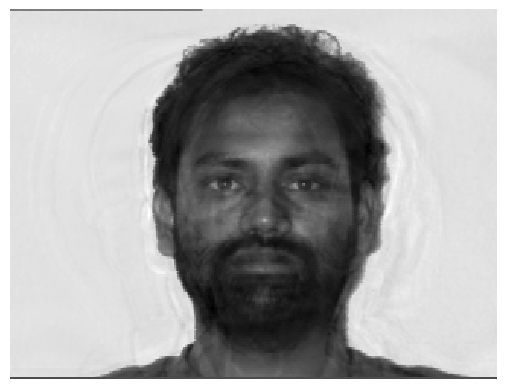

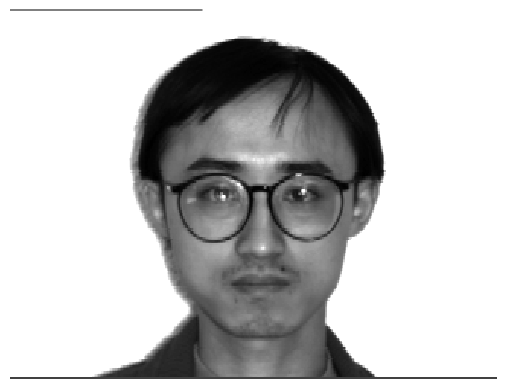

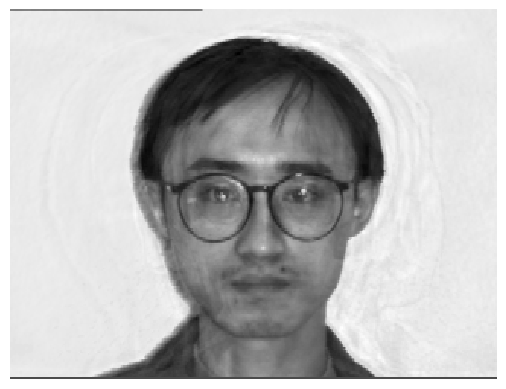

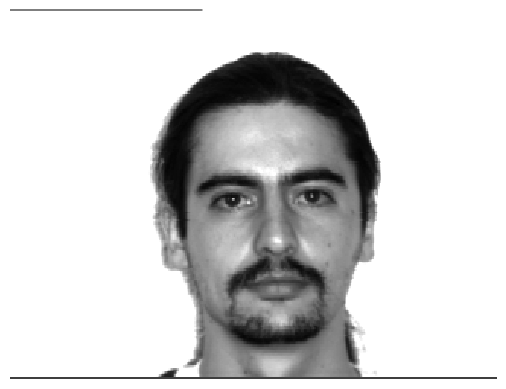

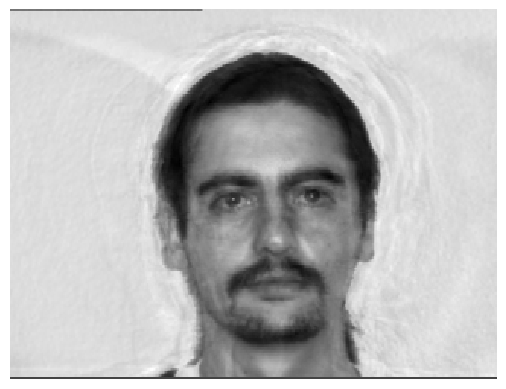

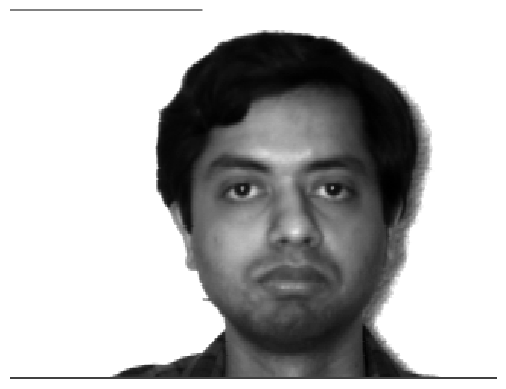

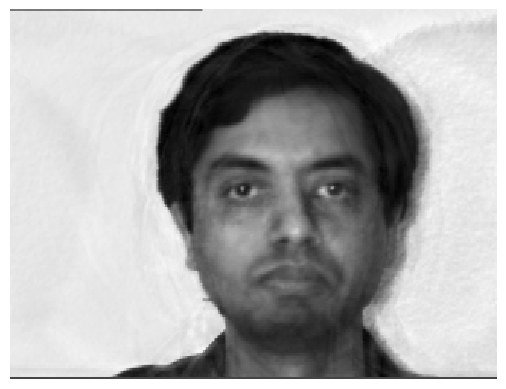

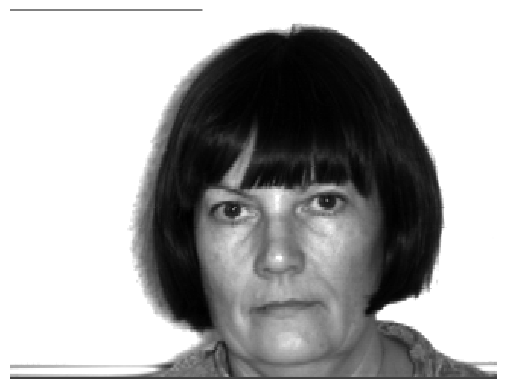

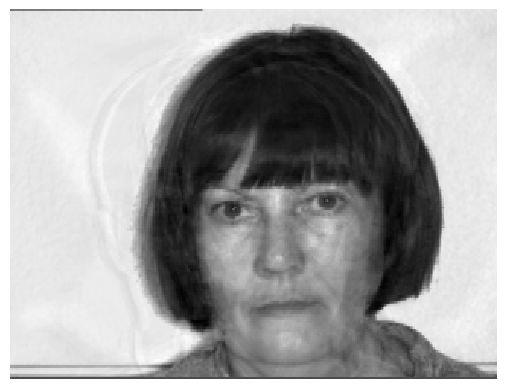

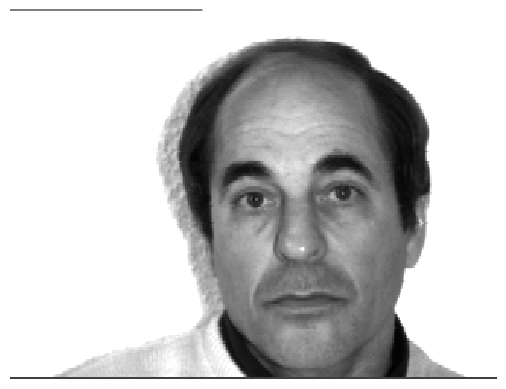

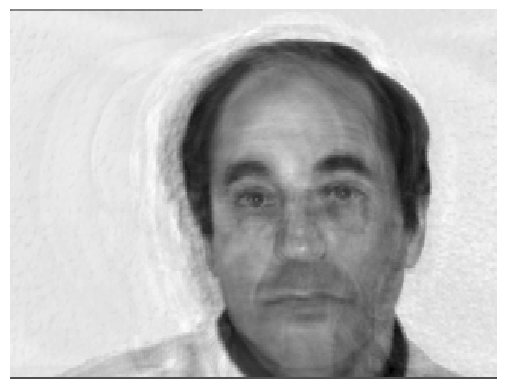

In [158]:
for person_id in range(7, 13):
    for state in ['centerlight']:
        fn = path+ "/"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)  #X
        plt.axis('off')
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - X_mean   # X -X_mean
        # encode
        z = U.T.dot(x) #
        #decode
        x_tilde = U.dot(z) + X_mean

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
    #         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
    #         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [161]:
from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [163]:
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people( min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)


# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print( "n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [173]:
 h, w

(50, 37)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [177]:
X_train.shape

(966, 1850)

In [191]:
Ux ,Zx = pca(X_train,150)

In [ ]:
Ux@Zx+np.mean(X_train)

In [186]:
Ux.shape

(1850, 150)

In [185]:
X_train_pca.shape

(966, 150)

In [190]:
pcax.n_features_in_

1850

In [187]:
n_components = 150

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
pcax = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#TODO: pass the training dataset (X_train) to pca's 'fit()' method
pcax = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.131s


In [166]:
eigenfaces = pca.components_.reshape((n_components, h, w))

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


done in 0.022s


In [192]:
y_train

array([3, 1, 2, 6, 4, 6, 2, 6, 4, 5, 2, 2, 4, 1, 6, 2, 1, 3, 2, 3, 6, 3,
       3, 6, 1, 3, 0, 1, 6, 5, 4, 5, 3, 0, 3, 1, 6, 3, 6, 2, 3, 0, 1, 1,
       3, 6, 3, 3, 3, 3, 5, 6, 4, 3, 3, 0, 1, 3, 6, 4, 3, 3, 6, 6, 0, 3,
       6, 0, 2, 5, 3, 1, 2, 6, 3, 3, 1, 3, 5, 2, 2, 3, 1, 0, 3, 1, 5, 1,
       6, 5, 3, 3, 1, 4, 1, 3, 3, 1, 3, 0, 1, 1, 4, 3, 1, 3, 3, 2, 3, 3,
       3, 3, 5, 1, 3, 2, 6, 2, 3, 3, 3, 4, 5, 1, 6, 3, 3, 3, 1, 4, 1, 3,
       0, 3, 3, 1, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 1, 6, 4, 2, 6, 3, 3, 4,
       5, 3, 0, 3, 3, 1, 4, 6, 1, 3, 1, 5, 3, 2, 2, 5, 3, 3, 1, 2, 4, 2,
       0, 1, 3, 4, 3, 3, 3, 3, 3, 3, 6, 1, 3, 0, 0, 5, 3, 5, 6, 0, 3, 2,
       3, 3, 3, 6, 3, 1, 3, 5, 2, 3, 6, 3, 3, 6, 3, 3, 0, 3, 3, 3, 3, 6,
       0, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 4, 2, 1, 3, 3, 1, 1, 1,
       5, 5, 2, 5, 3, 3, 3, 3, 6, 3, 5, 2, 3, 3, 4, 3, 3, 3, 0, 0, 3, 0,
       4, 1, 1, 5, 6, 5, 3, 3, 3, 0, 2, 3, 3, 2, 3, 6, 3, 2, 3, 2, 3, 0,
       0, 6, 1, 0, 3, 1, 0, 4, 1, 3, 4, 4, 3, 3, 2,

In [167]:
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [168]:
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.91      0.83      0.87        36

         accuracy                           0.86       322
        macro avg       0.91      0.74      0.80       322
     weighted avg       0.87      0.86      0.86       322



In [169]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[  7   1   0   5   0   0   0]
 [  1  53   0   6   0   0   0]
 [  0   3  17   6   0   0   1]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   4   0   1   1   8   1]
 [  0   1   1   4   0   0  30]]


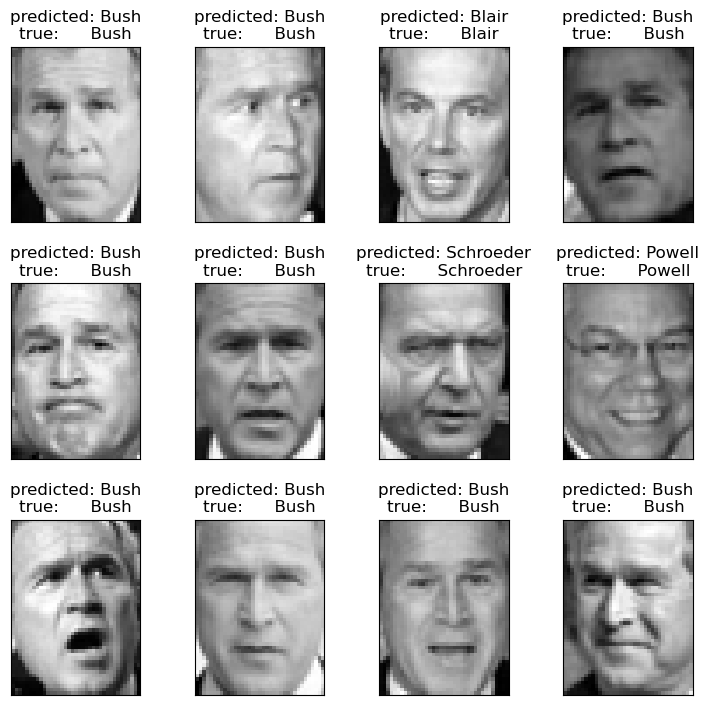

In [170]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

pl.show()